In [121]:
import numpy as np
import cv2 as cv,cv2
from matplotlib import pyplot as plt


img = cv.imread('DJI_0982.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)      


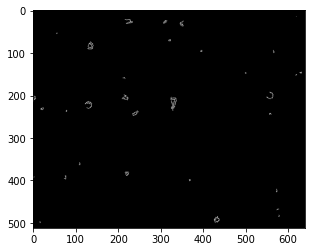

In [122]:
lowThreshold = 100
highThreshold = 200
img_edges = cv.Canny(img_gray, lowThreshold, highThreshold, True)
plt.imshow(img_edges,cmap='gray')
plt.show()



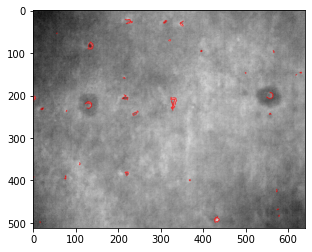

In [123]:
img_original = img.copy()

contours, hierarchy = cv2.findContours(img_edges, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img_original, contours=contours, contourIdx=-1, color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)
plt.imshow(img_original)
plt.show()

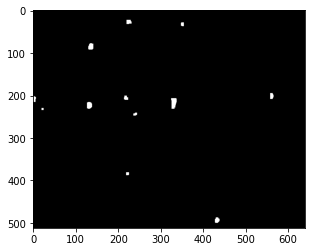

In [124]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
img_morph = cv.morphologyEx(img_edges, cv.MORPH_CLOSE, kernel, iterations=1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
img_morph = cv.morphologyEx(img_morph, cv.MORPH_OPEN, kernel, iterations=1)
plt.imshow(img_morph,cmap='gray')
plt.show()

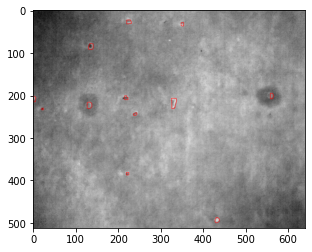

In [125]:
img_original = img.copy()

contours, hierarchy = cv2.findContours(img_morph, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img_original, contours=contours, contourIdx=-1, color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)
plt.imshow(img_original)
plt.show()